# Ridge Regression (Tikhonoc regularization)

In [1]:
from sklearn.linear_model import Ridge

In [2]:
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [3]:
import numpy as np
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.rand(m,1)
ridge_reg.fit(X,y)
print(ridge_reg.intercept_,ridge_reg.coef_)
print(ridge_reg.predict([[3]]))

[3.64472893] [[0.83112689]]
[[6.1381096]]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston

In [5]:
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data,columns = boston_data.feature_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
boston['Price']=boston_data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
new_X = boston.drop('Price',axis=1)
new_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
new_Y = boston_data.target

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_X,new_Y,test_size=0.3,random_state=3)
X_train.shape,X_test.shape,y_train.shape,y_train.shape

((354, 13), (152, 13), (354,), (354,))

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
rr = Ridge(alpha = 0.01)
rr

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
rr.fit(X_train,y_train)
train_score = lr.score(X_train,y_train)
train_score

0.7419034960343789

In [13]:
test_score = lr.score(X_test,y_test)
test_score

0.7147895265576849

In [14]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_train_score

0.7419030253527293

In [15]:
Ridge_test_score = rr.score(X_test,y_test)
Ridge_test_score

0.7146125373123909

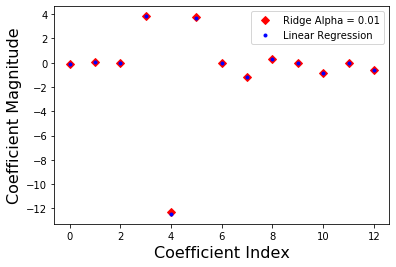

In [16]:
plt.plot(rr.coef_,linestyle='none',marker='D',markersize=5,color='red',label = 'Ridge Alpha = 0.01')
plt.plot(lr.coef_,linestyle='none',marker='o',markersize=3,color='b',label = 'Linear Regression')
plt.xlabel("Coefficient Index",fontsize=16)
plt.ylabel("Coefficient Magnitude",fontsize=16)
plt.legend()
plt.show()

## Lasso Regression (Least Absolute Shrinkage and Selection Operator Regression)

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.82371171])

In [18]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
print(cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
cancer = pd.DataFrame(cancer_data.data,columns = cancer_data.feature_names)
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
X = cancer_data.data
Y = cancer_data.target

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [22]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
print(train_score,test_score)

0.6697889264317262 0.6705186224144859


In [29]:
import numpy as np
coeff_used = np.sum(lasso.coef_!=0)
print(coeff_used)
print(cancer.columns[lasso.coef_!=0])

5
Index(['mean area', 'area error', 'worst texture', 'worst perimeter',
       'worst area'],
      dtype='object')


In [30]:
print("Training score",train_score)
print("Test score",test_score)
print("Number of features to be used",coeff_used)

Training score 0.6697889264317262
Test score 0.6705186224144859
Number of features to be used 5


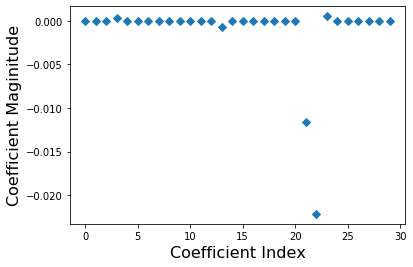

In [31]:
import matplotlib.pyplot as plt
plt.xlabel("Coefficient Index",fontsize=16)
plt.ylabel("Coefficient Maginitude",fontsize=16)
# plt.subplot(122)
plt.plot(lasso.coef_,linestyle='none',marker='D',markersize=5)
# plt.tight_layout()
plt.show()

In [27]:
cancer.columns[20:25]

Index(['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness'],
      dtype='object')

## ElasticNet
- As there are 30 features, initially but on the application of Lasso regression, only 2 features are used, rest are all shrunk to zero (see the red points in above plot) Try for different alpha to get best test score if you get less test and train scores as the data falls underfitting.
- In general ElasticNet is preferred over Lasso since Lasso may behave erratically when the number of features are greater than the number of training instances

In [28]:
from sklearn.linear_model import ElasticNet
import numpy as np
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.rand(m,1)
elastic_net = ElasticNet(alpha = 0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.18305791])